In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib
import math
import os
from sympy import isprime

DEBUG = True
DEBUG_SIZE = 5000
print(os.listdir("../input"))

cities_df = pd.read_csv('../input/cities.csv')
sample_submission = pd.read_csv('submission.csv')

if DEBUG:
#     cities_df = cities_df[:DEBUG_SIZE]
    sample_submission = sample_submission[:DEBUG_SIZE]

['cities.csv', 'sample_submission.csv']


In [2]:
cities_df.head(15)

,CityId,X,Y
0,0,316.836739,2202.340707
1,1,4377.405972,336.602082
2,2,3454.158198,2820.053011
3,3,4688.099298,2935.898056
4,4,1010.696952,3236.750989
5,5,2474.230877,1435.514651
6,6,1029.277795,2721.800952
7,7,3408.887685,199.585793
8,8,1304.006125,2657.427246
9,9,4211.525725,2294.595208


In [3]:
cities_df.describe()

,CityId,X,Y
count,197769.000000,197769.000000,197769.000000
mean,98884.000000,2741.169734,1859.277703
std,57091.137031,1474.870239,985.144313
min,0.000000,1.871925,0.000000
25%,49442.000000,1439.292001,1054.234324
50%,98884.000000,2772.522934,1946.624393
75%,148326.000000,4246.994405,2736.536831
max,197768.000000,5099.502142,3397.809824


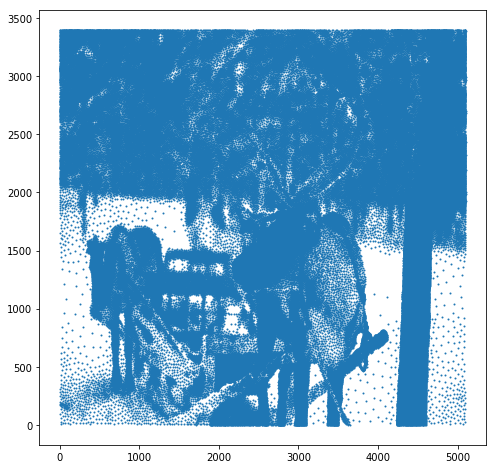

In [4]:
figure = plt.figure(figsize=(8,8))
plt.scatter(cities_df['X'], cities_df['Y'], 1)

In [5]:
# Score Calculation
# The function to get the distance between the cities.
def penalty_length(x1, y1, x2, y2, prev_is_prime, is_10th):
    # Every 10th step is 10% more lengthy unless coming from a prime CityId.
    cost_factor = 0.1 if is_10th and not prev_is_prime else 0
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2) * cost_factor

def distance(x1, y1, x2, y2, prev_is_prime, is_10th):
    # Every 10th step is 10% more lengthy unless coming from a prime CityId.
    cost_factor = 1.1 if is_10th and not prev_is_prime else 1.0
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2) * cost_factor

# The function to calculate score.
# The beginning and end of the paths must be City'0'.
def calculate_score(paths, cities_df):
    cities_df['IsPrime'] = cities_df['CityId'].apply(isprime)
    cities_df_dict = cities_df.to_dict()

    sum_distance = 0
    penalty_distance = 0
    prev_x, prev_y = cities_df_dict['X'][0], cities_df_dict['Y'][0]
    prev_is_prime = False

    for i, city in enumerate(paths):
        x, y = cities_df_dict['X'][city], cities_df_dict['Y'][city]
        is_prime = cities_df_dict['IsPrime'][city]

        sum_distance += distance(prev_x, prev_y, x, y, prev_is_prime, i % 10 == 0)
        penalty_distance += penalty_length(prev_x, prev_y, x, y, prev_is_prime, i % 10 == 0)
        prev_x, prev_y = x, y
        prev_is_prime = is_prime

    return sum_distance, penalty_distance
# Sample calculation

score, penalty = calculate_score(sample_submission['Path'], cities_df)
print('Score   : ' + str(score))
print('Penalty: ' + str(penalty))
#sample_submission.to_csv('to_submit.csv', index=None)


Score   : 36828.40262204465
Penalty: 328.3915592597427


In [6]:
## count prime number
count_prime = 0
cities_df['IsPrime'] = cities_df['CityId'].apply(isprime)
cities_df_dict = cities_df.to_dict()
for i, city in enumerate(sample_submission['Path']):
    if cities_df_dict['IsPrime'][city]:
        count_prime += 1

print(count_prime)

452


In [27]:
## count used prime number
count_used_prime = 0
count_penalty = 0
cities_df['IsPrime'] = cities_df['CityId'].apply(isprime)
cities_df_dict = cities_df.to_dict()
for i, city in enumerate(sample_submission['Path']):
    if (i + 2) % 10 == 0:
        if cities_df_dict['IsPrime'][city]:
            count_used_prime += 1
        else:
            count_penalty += 1

print('used prime number: ' + str(count_used_prime))
print('unused prime number: ' + str(count_prime - count_used_prime))
print('how many penarty: ' + str(count_penalty))

used prime number: 56
unused prime number: 396
how many penarty: 444


In [30]:
a = 0
for i, city in enumerate(sample_submission['Path']):
    if cities_df_dict['IsPrime'][city]:
        if (i + 2) % 10 == 0:
            a += 1
print(a)

56
